## Rain Prediction

In [1]:
# Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import  cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into df
df = pd.read_csv('rain.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# checking the data dimension
df.shape

(8425, 23)

In [4]:
# checking the DataType
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Describing the attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## checking the null values

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

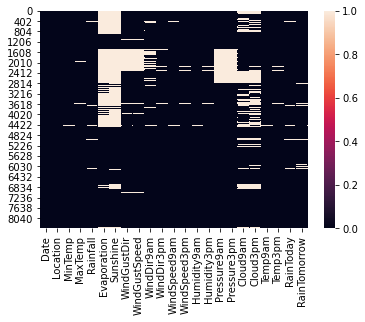

In [7]:
sns.heatmap(df.isnull())

There are huge null values

# Unique values

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

## Statistcal Summary

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


## correlation

In [10]:
df_cor = df.corr()
df_cor

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


<AxesSubplot:>

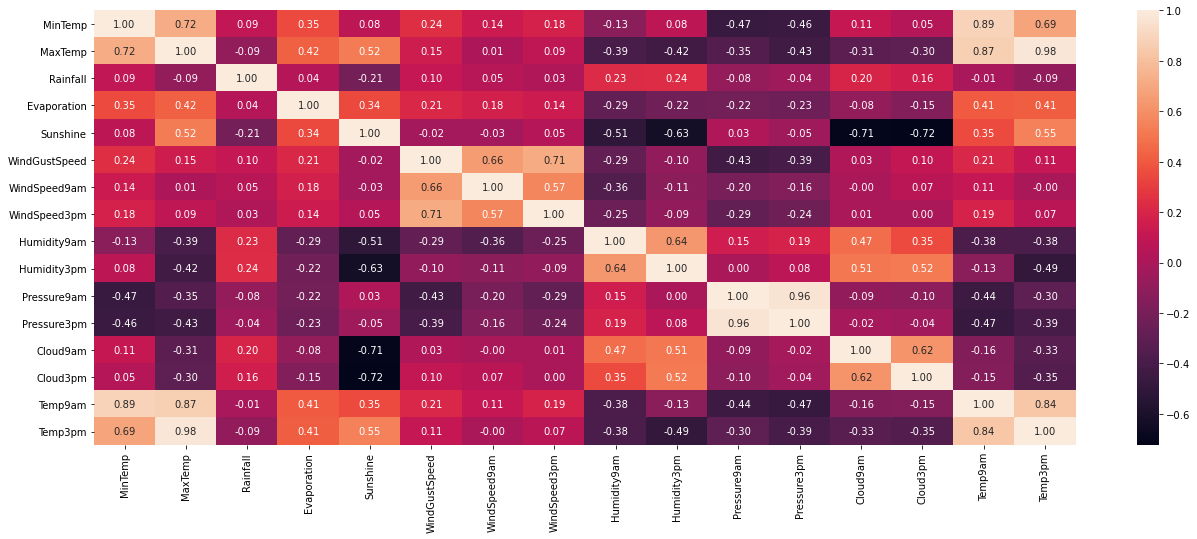

In [11]:
plt.figure(figsize=(22,8))
sns.heatmap(df_cor ,annot=True ,fmt='0.2f')

In [12]:
# filling the null values with mean
from sklearn.impute import SimpleImputer
sm = SimpleImputer(missing_values = np.nan , strategy = 'mean')
df['MinTemp'] = sm.fit_transform(df['MinTemp'].values.reshape(-1,1))

df['MaxTemp']=sm.fit_transform(df['MaxTemp'].values.reshape(-1,1))
df['Rainfall']=sm.fit_transform(df['Rainfall'].values.reshape(-1,1))
df['Evaporation']=sm.fit_transform(df['Evaporation'].values.reshape(-1,1))
df['Sunshine']=sm.fit_transform(df['Sunshine'].values.reshape(-1,1))
df['WindGustSpeed']=sm.fit_transform(df['WindGustSpeed'].values.reshape(-1,1))
df['WindSpeed9am']=sm.fit_transform(df['WindSpeed9am'].values.reshape(-1,1))
df['WindSpeed3pm']=sm.fit_transform(df['WindSpeed3pm'].values.reshape(-1,1))
df['Humidity9am']=sm.fit_transform(df['Humidity9am'].values.reshape(-1,1))
df['Humidity3pm']=sm.fit_transform(df['Humidity3pm'].values.reshape(-1,1))
df['Pressure9am']=sm.fit_transform(df['Pressure9am'].values.reshape(-1,1))
df['Pressure3pm']=sm.fit_transform(df['Pressure3pm'].values.reshape(-1,1))
df['Cloud9am']=sm.fit_transform(df['Cloud9am'].values.reshape(-1,1))
df['Cloud3pm']=sm.fit_transform(df['Cloud3pm'].values.reshape(-1,1))
df['Temp9am']=sm.fit_transform(df['Temp9am'].values.reshape(-1,1))
df['Temp3pm']=sm.fit_transform(df['Temp3pm'].values.reshape(-1,1))


In [13]:
# filling the null values with most_frequent
sim = SimpleImputer(missing_values = np.nan ,strategy = 'most_frequent')

df['RainToday']= sim.fit_transform(df['RainToday'].values.reshape(-1,1))
df['RainTomorrow']= sim.fit_transform(df['RainTomorrow'].values.reshape(-1,1))
df['WindDir9am'] = sim.fit_transform(df['WindDir9am'].values.reshape(-1,1))
df['WindDir3pm'] = sim.fit_transform(df['WindDir3pm'].values.reshape(-1,1))
df['WindGustDir'] = sim.fit_transform(df['WindGustDir'].values.reshape(-1,1))


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [15]:
df['RainToday'].value_counts()

0    6435
1    1990
Name: RainToday, dtype: int64

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## DATA VISUALIZATION

0    6435
1    1990
Name: RainToday, dtype: int64

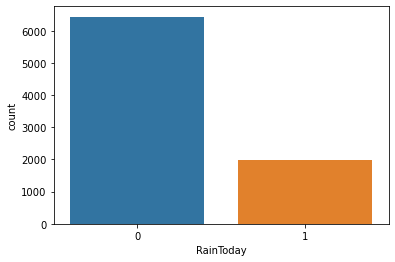

In [17]:
sns.countplot(df['RainToday'])
df['RainToday'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

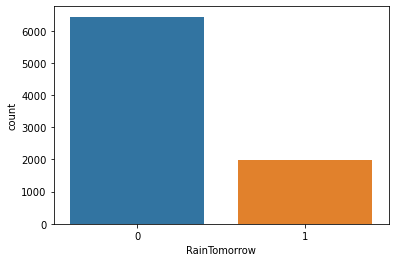

In [18]:
sns.countplot(df['RainTomorrow'])
df['RainTomorrow'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'NNW'),
  Text(2, 0, 'SE'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'SW'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'S'),
  Text(7, 0, 'NE'),
  Text(8, 0, 'N'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'WSW'),
  Text(11, 0, 'ESE'),
  Text(12, 0, 'E'),
  Text(13, 0, 'NW'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'NNE')])

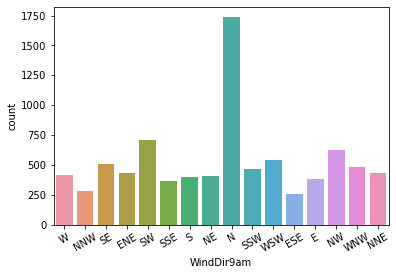

In [19]:
sns.countplot(df['WindDir9am'])
df['WindDir9am'].value_counts()
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'WNW'),
  Text(1, 0, 'WSW'),
  Text(2, 0, 'E'),
  Text(3, 0, 'NW'),
  Text(4, 0, 'W'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'ESE'),
  Text(7, 0, 'ENE'),
  Text(8, 0, 'NNW'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'SW'),
  Text(11, 0, 'SE'),
  Text(12, 0, 'N'),
  Text(13, 0, 'S'),
  Text(14, 0, 'NNE'),
  Text(15, 0, 'NE')])

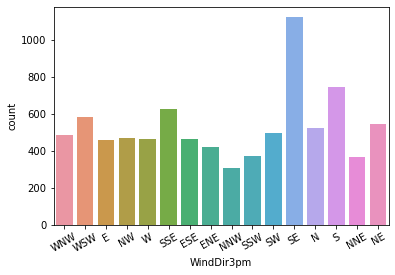

In [20]:
sns.countplot(df['WindDir3pm'])
df['WindDir3pm'].value_counts()
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'WNW'),
  Text(2, 0, 'WSW'),
  Text(3, 0, 'NE'),
  Text(4, 0, 'NNW'),
  Text(5, 0, 'N'),
  Text(6, 0, 'NNE'),
  Text(7, 0, 'SW'),
  Text(8, 0, 'ENE'),
  Text(9, 0, 'SSE'),
  Text(10, 0, 'S'),
  Text(11, 0, 'NW'),
  Text(12, 0, 'SE'),
  Text(13, 0, 'ESE'),
  Text(14, 0, 'E'),
  Text(15, 0, 'SSW')])

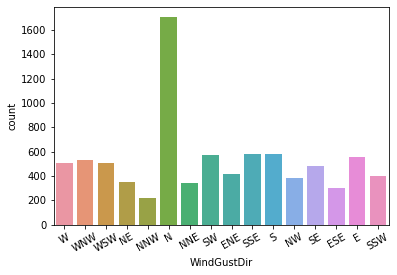

In [21]:
sns.countplot(df['WindGustDir'])
df['WindGustDir'].value_counts()
plt.xticks(rotation=30)

In [22]:
le =LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [23]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


<AxesSubplot:xlabel='Humidity9am'>

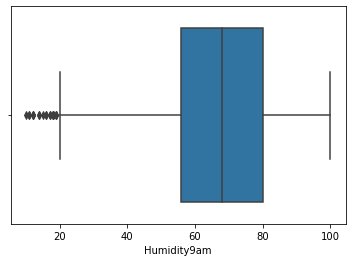

In [24]:
sns.boxplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm'>

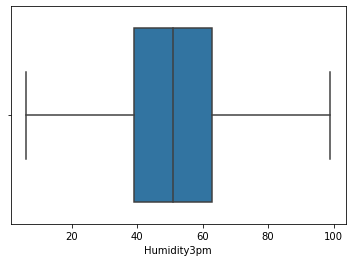

In [25]:
sns.boxplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am'>

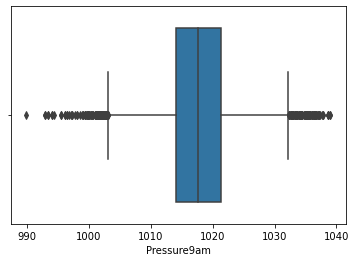

In [26]:
sns.boxplot(df['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm'>

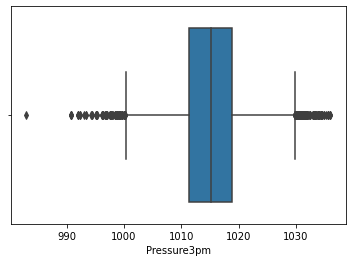

In [27]:
sns.boxplot(df['Pressure3pm'])


<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

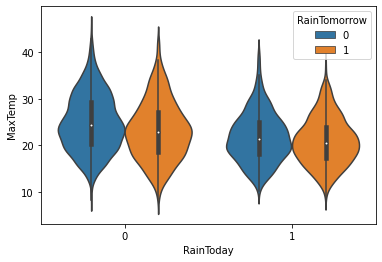

In [28]:
sns.violinplot(x='RainToday',y='MaxTemp',data=df,hue='RainTomorrow')

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

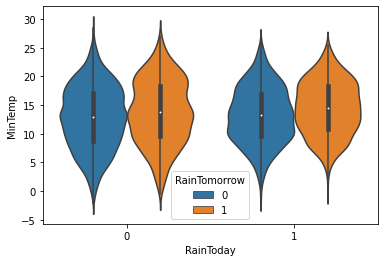

In [29]:
sns.violinplot(x='RainToday',y='MinTemp',data=df,hue='RainTomorrow')

## Dropping highly correlated columns


In [30]:
df=df.drop(['Date','Temp3pm','Temp9am','Humidity9am'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Remove outliers

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([  12,   12,   44,   52,   52,   60,   61,   62,   62,   68,  123,
        267,  296,  381,  381,  407,  431,  462,  563,  568,  568,  569,
        602,  683,  683,  699,  713,  748,  748,  770,  796,  797,  802,
        928,  935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138,
       1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357,
       1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661,
       1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028,
       2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231,
       2265, 2429, 2488, 2500, 2505, 2527, 2541, 2593, 2676, 2677, 2735,
       2827, 2835, 2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082,
       3089, 3089, 3099, 3099, 3101, 3141, 3150, 3

In [32]:
df = df[(z<3).all(axis=1)]

## Model building

In [33]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
y.value_counts()

0    6185
1    1823
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

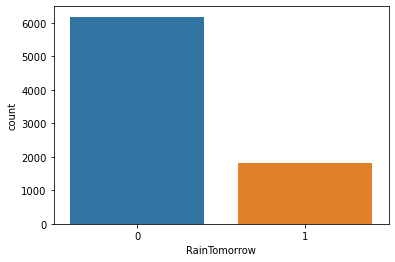

In [35]:
sns.countplot(y)

## Balancing the data using SMOTE


In [36]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
xtrain,ytrain = smt.fit_resample(x,y)

In [37]:
ytrain.value_counts()

0    6185
1    6185
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

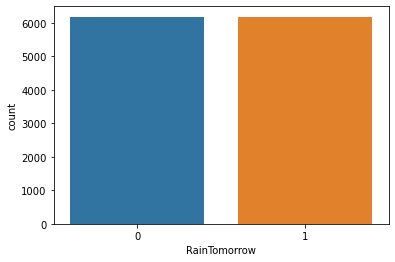

In [38]:
sns.countplot(ytrain)

## Training the model

In [39]:
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size = .30 ,random_state = 45)

## Logistic Regression

In [40]:
lg =LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

Accuracy_score 0.7666397197520883
[[1471  388]
 [ 478 1374]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1859
           1       0.78      0.74      0.76      1852

    accuracy                           0.77      3711
   macro avg       0.77      0.77      0.77      3711
weighted avg       0.77      0.77      0.77      3711



## GaussianNB

In [41]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy_score 0.7329560765292374
[[1422  437]
 [ 554 1298]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1859
           1       0.75      0.70      0.72      1852

    accuracy                           0.73      3711
   macro avg       0.73      0.73      0.73      3711
weighted avg       0.73      0.73      0.73      3711



## SVC

In [42]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy_score 0.7528967933171652
[[1509  350]
 [ 567 1285]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1859
           1       0.79      0.69      0.74      1852

    accuracy                           0.75      3711
   macro avg       0.76      0.75      0.75      3711
weighted avg       0.76      0.75      0.75      3711



## Random Forest Classifier

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy_score',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy_score 0.9293990838049043
[[1717  142]
 [ 120 1732]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1859
           1       0.92      0.94      0.93      1852

    accuracy                           0.93      3711
   macro avg       0.93      0.93      0.93      3711
weighted avg       0.93      0.93      0.93      3711



## Cross Validation

In [44]:
scr = cross_val_score(lg,xtrain,ytrain ,cv=5)
print('cross validation score of logistic regression',scr.mean())

cross validation score of logistic regression 0.714874696847211


In [45]:
scr = cross_val_score(gnb,xtrain,ytrain ,cv=5)
print('cross validation score of GaussianNB ',scr.mean())

cross validation score of GaussianNB  0.7117219078415522


In [46]:
scr = cross_val_score(svc,xtrain,ytrain ,cv=5)
print('cross validation score of SVC',scr.mean())

cross validation score of SVC 0.733791430881164


In [47]:
scr = cross_val_score(rf,xtrain,ytrain ,cv=5)
print('cross validation score of RandomForestClassifier',scr.mean())

cross validation score of RandomForestClassifier 0.8151172190784155


## hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Creating parameter list to pass in GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth':[4,5,6,7,8],
                'criterion':['gini','entropy']}

In [49]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train, y_train) #Fitting the data in model
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [50]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred) #Checking final accuracy

0.8579897601724602

## ROC AUC PLOT

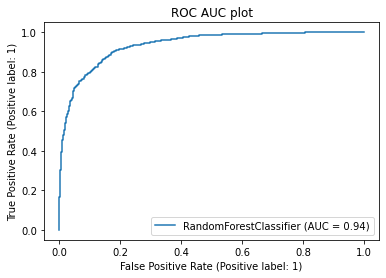

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test, y_test)
plt.title("ROC AUC plot")
plt.show()

AUC_score is 93% which is pretty good

## Saving the model 

In [52]:
import joblib
joblib.dump(rf,"rain")

['rain']